In [0]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib import cm

In [276]:
pip install networkx

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#G=nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/aves-sparrow-social.edges", nodetype=int, data=(('weight', float),('year', int),))

G_t0=nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/sparrow-social-t0.edges", nodetype=int, data=(('weight', float),))
G_t1=nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/sparrow-social-t1.edges", nodetype=int, data=(('weight', float),))


In [384]:
n_t1 = G.number_of_nodes()
m_t1 = G.number_of_edges()
print("Number of nodes : %d" % n_t1)
print("Number of edges : %d" % m_t1)
print("Number of connected components : %d" % nx.number_connected_components(G_t1))


Number of nodes : 52
Number of edges : 454
Number of connected components : 1


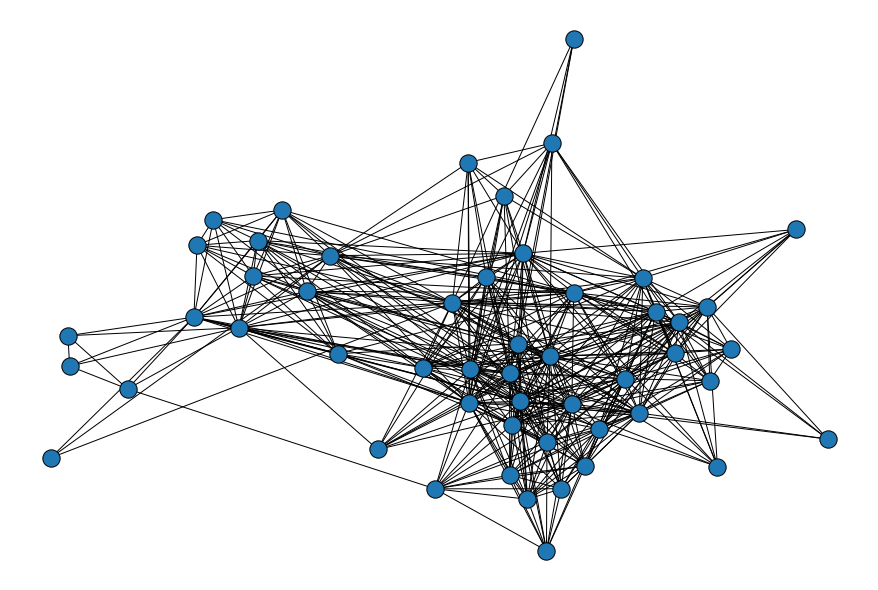

In [385]:
plt.figure(figsize=(12,8))
nx.draw(G_t1)
plt.gca().collections[0].set_edgecolor("#000000")


In [437]:
#G_t0.add_nodes_from((G_t1.nodes - G_t0.nodes ))

edge_subset = G_t1.edges - G_t0.edges

print(len(G_t1.nodes - G_t0.nodes))

21


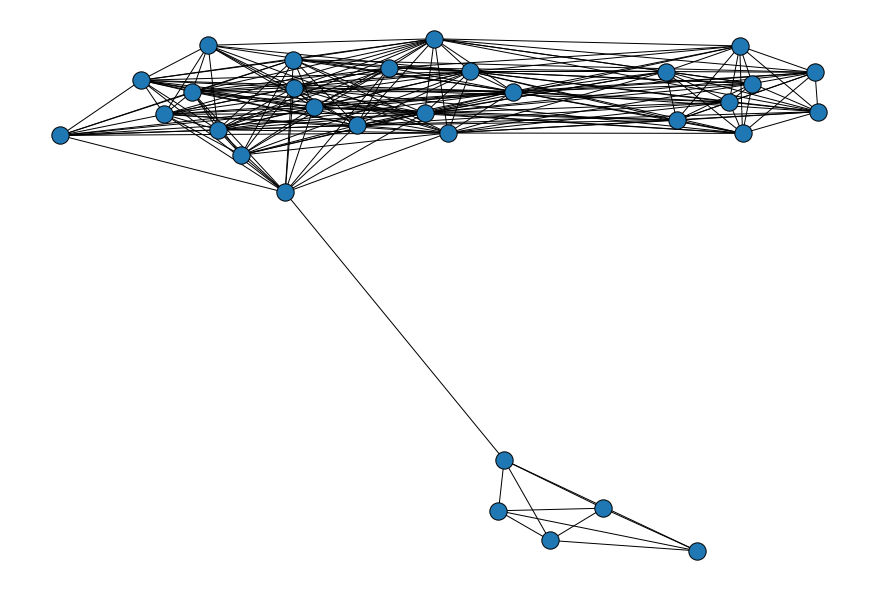

In [431]:
plt.figure(figsize=(12,8))
nx.draw(G_t0)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

In [432]:
edge_subset_size = G_t0.number_of_edges()
print("Number of edges removed   : %d" % edge_subset_size)
print("Number of edges remaining : %d" % (m_t1 - edge_subset_size))


Number of edges removed   : 211
Number of edges remaining : 243


In [0]:
# Make prediction using Jaccard Coefficient
pred_jaccard = list(nx.jaccard_coefficient(G_t0))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])


# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.roc_auc_score(label_jaccard, score_jaccard)

In [0]:
# Prediction using Adamic Adar 
pred_adamic = list(nx.adamic_adar_index(G_t0))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

# Compute the ROC AUC Score
fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = metrics.roc_auc_score(label_adamic, score_adamic)

In [0]:
# Compute the Preferential Attachment
pred_pref = list(nx.preferential_attachment(G_t0))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

# Compute the ROC AUC Score
fpr_pref, tpr_pref, _ = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.roc_auc_score(label_pref, score_pref)

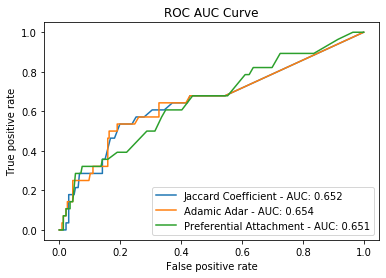

In [436]:
ax = plt.axes()
ax.plot(fpr_jaccard, tpr_jaccard, label='line 1')
ax.plot(fpr_adamic, tpr_adamic, label='line 2')
ax.plot(fpr_pref, tpr_pref, label='line 3')
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title("ROC AUC Curve")
ax.legend(('Jaccard Coefficient - AUC: ' + str(auc_jaccard)[:5], 'Adamic Adar - AUC: ' + str(auc_adamic)[:5], 'Preferential Attachment - AUC: ' + str(auc_pref)[:5]),loc =  "lower right")

plt.show()

In [80]:
G_fb = nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()

print("Number of nodes: %d" % n)
print("Number of edges: %d" % m)
print("Number of connected components: %d" % nx.number_connected_components(G_fb))


Number of nodes: 150
Number of edges: 1693
Number of connected components: 2


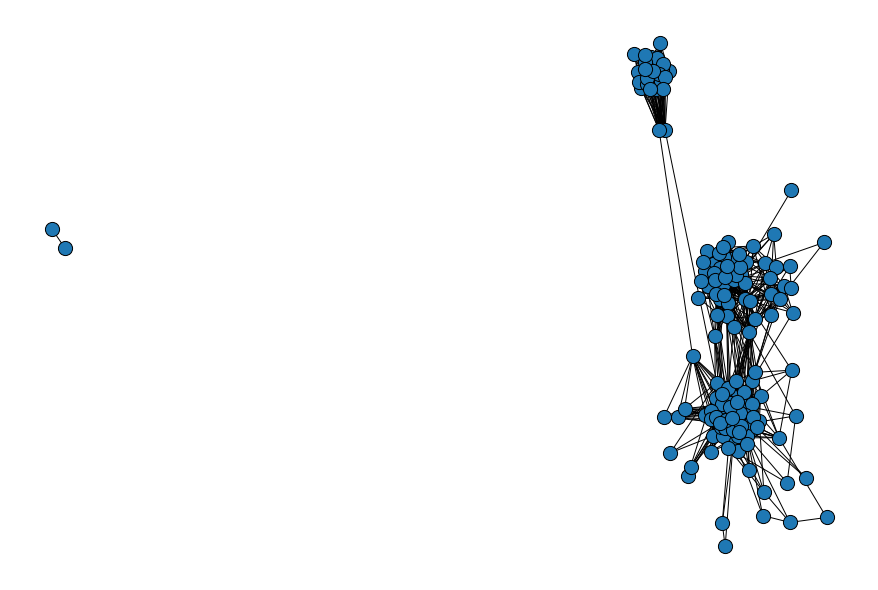

In [164]:
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)

plt.figure(figsize=(12,8))
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")

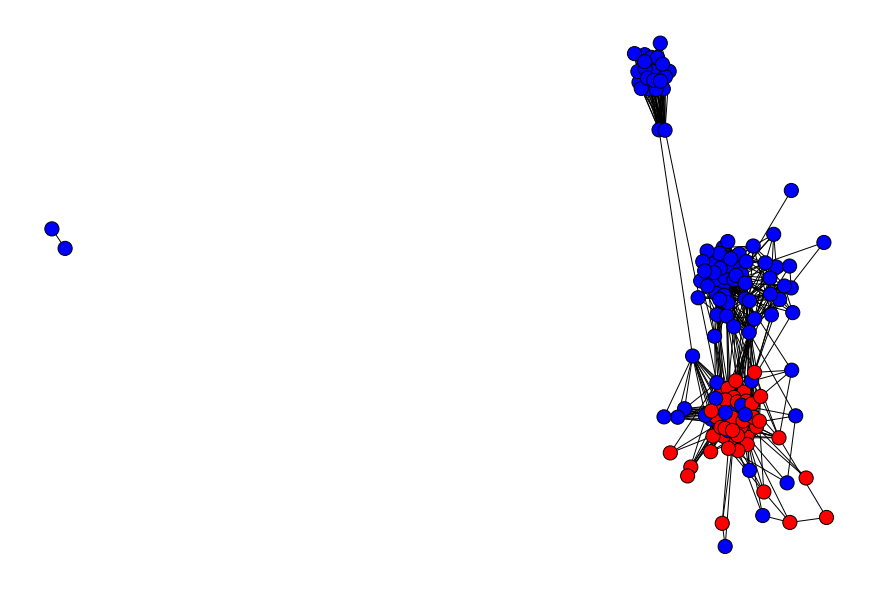

In [165]:
with open("/content/drive/My Drive/Colab Notebooks/facebook/414.featnames") as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1
features = np.zeros((n, n_feat))

f = open("/content/drive/My Drive/Colab Notebooks/facebook/414.feat", 'r')

for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]] 
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

print(cm.get_cmap('bwr'))

plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()

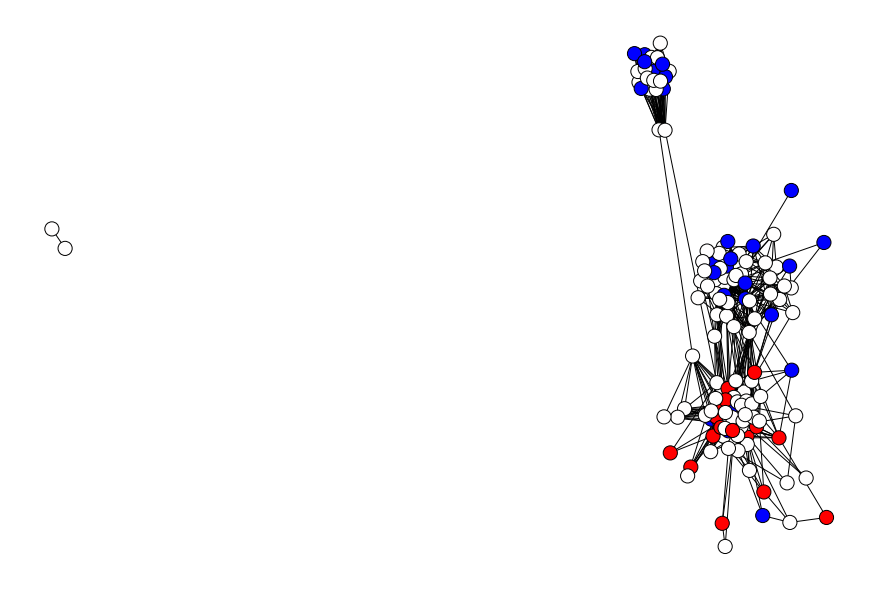

In [166]:
random.seed(5)
proportion_nodes = 0.3
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)

nodes = list(G_fb.nodes())


for e in labeled_nodes:
    known_labels[nodes.index(e)] = labels[nodes.index(e)]


#known_labels[labeled_nodes] = labels[labeled_nodes]



plt.figure(figsize=(12,8))
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.show()


In [0]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1
I = np.identity(n)

# Create the F-pred matrix
F_pred = np.linalg.inv(I*(1-alpha) + L_sym) * Y
# Identify the prediction as the argmax
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
# Compute the accuracy score
succ_rate = metrics.accuracy_score(labels, pred)


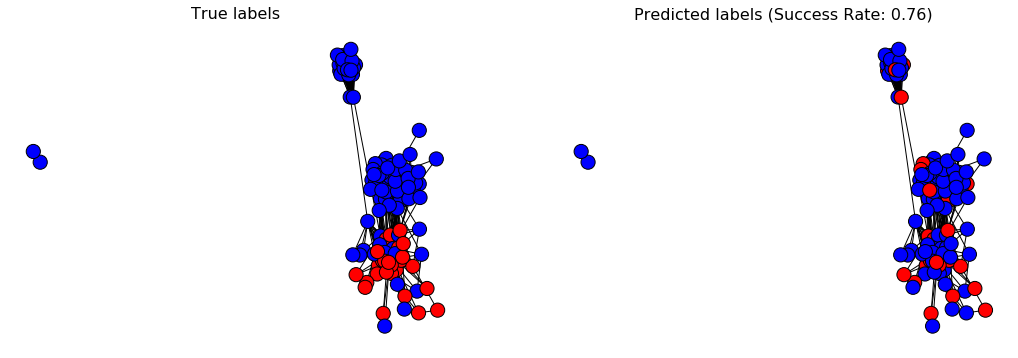

In [169]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

# Plot true values
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

# Plot predicted values
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = pred, node_size=200, pos=pos)
axarr[1].set_title('Predicted labels (Success Rate: %.2f)' % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")


In [10]:
G_iip = nx.read_edgelist("/content/drive/My Drive/Colab Notebooks/internet-industry-partnerships.edges",  delimiter=",",)
n_iip = G_iip.number_of_nodes()
m_iip = G_iip.number_of_edges()

print("Number of nodes: %d" % n_iip)
print("Number of edges: %d" % m_iip)
print("Number of connected components: %d" % nx.number_connected_components(G_iip))


Number of nodes: 219
Number of edges: 630
Number of connected components: 1


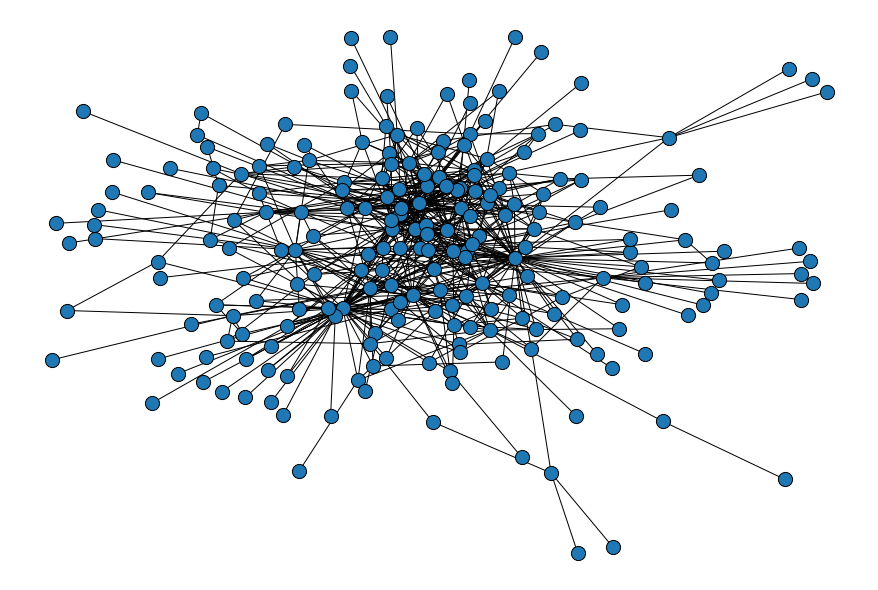

In [24]:
mapping=dict(zip(G_iip.nodes(), range(n_iip)))
nx.relabel_nodes(G_iip, mapping, copy=True)
pos_iip = nx.spring_layout(G_iip)

plt.figure(figsize=(12,8))
nx.draw(G_iip, node_size=200, pos=pos_iip)
plt.gca().collections[0].set_edgecolor("#000000")

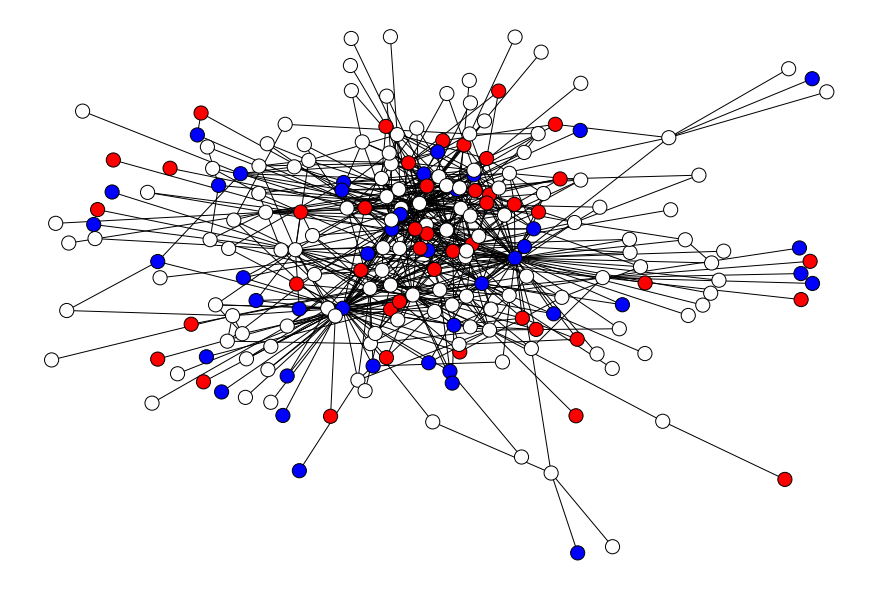

In [35]:
f = open("/content/drive/My Drive/Colab Notebooks/internet-industry-partnerships.node_labels", 'r')


labels_iip = []
for line in f:
    labels_iip.append(int(line))


plt.figure(figsize=(12,8))
nx.draw(G_iip, cmap = plt.get_cmap('bwr'), nodelist=range(n_iip), node_color = labels_iip, node_size=200, pos=pos_iip)
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()


In [0]:
random.seed(5)
proportion_nodes = 0.7
labeled_nodes_iip = random.sample(G_iip.nodes(), int(proportion_nodes * G_iip.number_of_nodes()))

known_labels_iip = np.zeros(n_iip)

nodes_iip = list(G_iip.nodes())


for e in labeled_nodes_iip:
    known_labels_iip[nodes_iip.index(e)] = int(labels_iip[nodes_iip.index(e)])

known_labels_iip = known_labels_iip.astype(int)

In [0]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_iip)

Y = np.zeros((n_iip,3)).astype(int)


Y[known_labels_iip == 1, 0] = 1
Y[known_labels_iip == 2, 1] = 1
Y[known_labels_iip == 3, 2] = 1
I = np.identity(n_iip)


# Create the F-pred matrix
F_pred = np.linalg.inv(I*(1-alpha) + L_sym) * Y
# Identify the prediction as the argmax
pred = np.array(np.argmax(F_pred, axis=1)*2-1).flatten()
# Compute the accuracy score
succ_rate = metrics.accuracy_score(labels, pred)

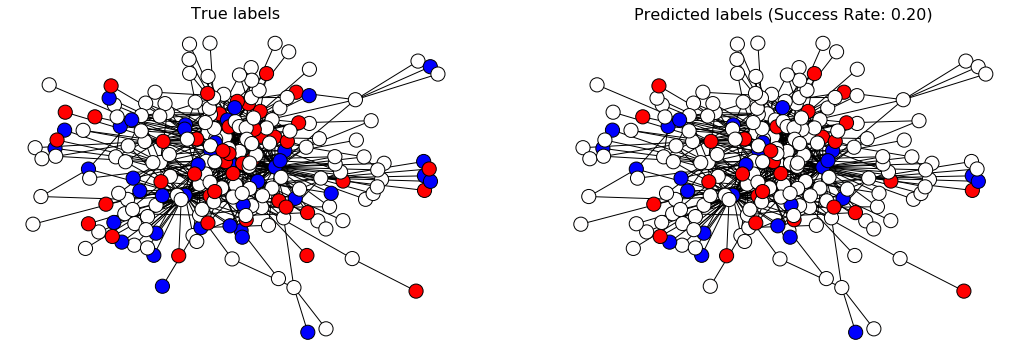

In [440]:
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

# Plot true values
plt.sca(axarr[0])
nx.draw(G_iip, cmap = plt.get_cmap('bwr'), nodelist=range(n_iip), node_color = labels_iip, node_size=200, pos=pos_iip)
axarr[0].set_title('True labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000")

# Plot predicted values
plt.sca(axarr[1])
nx.draw(G_iip, cmap = plt.get_cmap('bwr'), nodelist=range(n_iip), node_color = pred, node_size=200, pos=pos_iip)
axarr[1].set_title('Predicted labels (Success Rate: %.2f)' % succ_rate, size=16)
plt.gca().collections[0].set_edgecolor("#000000")
